<a href="https://colab.research.google.com/github/FaisAkbar/PembelajaranMesin/blob/main/Praktikum_Tugas_Perceptron%26ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Praktikum - Clustering Perceptron dan ANN
### Nama : Fawaa'el Akbar Firdaus
### No : 10
### NIM : 2141720215
### Kelas : TI-3B
### Github : https://github.com/FaisAkbar/PembelajaranMesin

# Praktikum 1

### Langkah 1 - Import Library dan Google Drive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Langkah 2 - Load Data dan Visualisasi

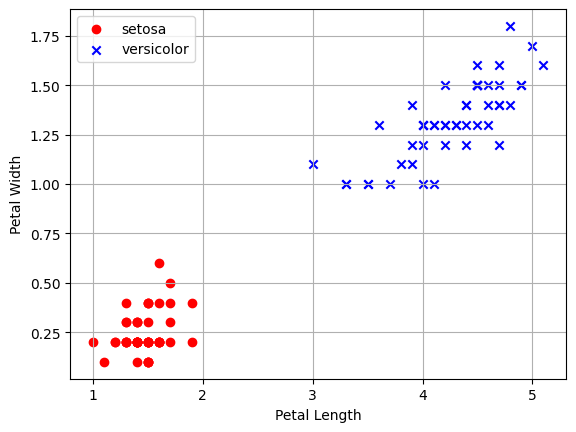

In [21]:
# Membaca data dari file CSV
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Menyimpan kolom yang sesuai dengan jenis bunga
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Indeks kolom yang akan digunakan untuk scatter plot
a, b = 2, 3  # Sesuaikan indeks kolom sesuai dengan data Anda

# Scatter plot
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Label sumbu dan legenda
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Langkah 3 - Membuat Kelas Perceptron

In [22]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan Encoding Label

In [23]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### Langkah 5 - Fitting Model

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai Error Per Epoch

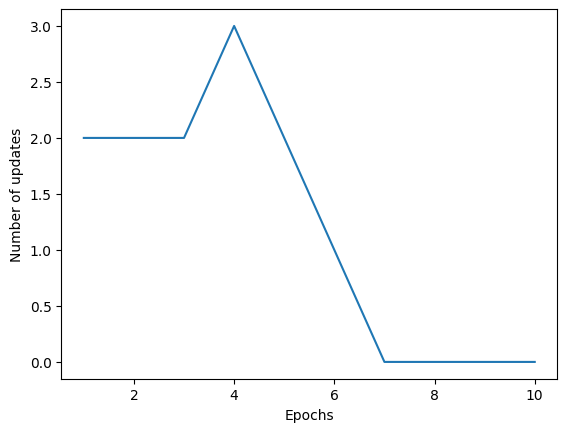

In [25]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-26-d7f314ba4772>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


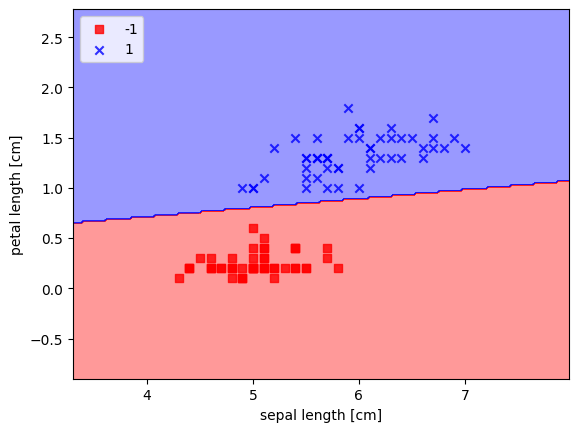

In [26]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Praktikum 2

### Langkah 1 - Import Library

In [27]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### Langkah 2 - Pilih Label dan Split Data

In [28]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [29]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Penjelasan
Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

# Praktikum 3

### Langkah 1 - Import Library

In [30]:
from sklearn.neural_network import MLPClassifier

### Langah 2 - Buat Data

In [31]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### Langkah 3 - Fit Model

In [32]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [33]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4

### Perhatian!
Pada praktikum ini, Anda akan menggunakan library tensorflow dari google. Oleh karena itu, Anda diharuskan untuk menginstal tensorflow terlebih dahulu.
Anda juga perlu menyesuaikan instalasi tensorflow yang Anda gunakan pada komputer lokal, apakah komputasi pada,
* CPU
* GPU (GPU support CUDA)
* Apple Silicon (M1/M2)
Panduan instalasi,
* https://www.tensorflow.org/install
* https://developer.apple.com/metal/tensorflow-plugin/
* https://caffeinedev.medium.com/how-to-install-tensorflow-on-m1-mac-8e9b91d93706

### Langkah 1 - Import Library

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [35]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
# Check Data
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
# Cek data (X) dengan print. Hasilnya,

### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# Cek data (X) dengan print. Hasilnya,

### Langkah 5 - Split Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [40]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [41]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [43]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [44]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [45]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.7623 - accuracy: 0.5148
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7857
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7977
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8024
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8062
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8110
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8138
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8155
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4125 - accura

# Membuat Prediksi
Diberikan informasi sebagai berikut,
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: \$ 60000
* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $ 50000
Apakah customer tersebut perlu dipertahankan?

### Modelkan Data Baru dan Buat Prediksi

In [46]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
# Apakah hasilnya False?

1/1 [==============================] - 0s 76ms/step
[[False]]


### Prediksi Dengan Data Testing

In [47]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 940us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Cek Akurasi dan Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# Hasil (bisa jadi berbeda),

[[1520   75]
 [ 201  204]]


0.862

# Tugas Kelompok

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
2. Anda diperbolehkan melakukan eksplorasi terhadap,
 * Metode pra pengolahan
 * Pemilihan fitur
 * Arsitektur ANN
 * Fungsi Aktiviasi
3. ANN diimplementasikan dengan menggunakan tensorflow.
4. DIKERJAKAN SECARA BERKELOMPOK
5. JELASKAN HASIL YANG ANDA DAPATKAN,
 * AKURASI
 * CONFUSION MATRIX
 * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [49]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms

In [50]:
# Download dataset MNIST menggunakan torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Dataset', train=True, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 140295437.88it/s]

Extracting /content/drive/MyDrive/Dataset/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 155302171.57it/s]


Extracting /content/drive/MyDrive/Dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40837617.71it/s]


Extracting /content/drive/MyDrive/Dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2139066.78it/s]


Extracting /content/drive/MyDrive/Dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Dataset/MNIST/raw



*transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])*: Baris ini mendefinisikan transformasi yang akan diterapkan pada gambar dalam dataset. Dalam hal ini, gambar akan diubah menjadi tensor PyTorch.

mnist_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Dataset', train=True, transform=transform, download=True) : Baris ini mengunduh dataset MNIST ke direktori yang ditentukan (dalam hal ini, ‘/content/drive/MyDrive/Machine_Learning’). Parameter train=True berarti bahwa dataset pelatihan akan diunduh. Transformasi yang telah didefinisikan sebelumnya diterapkan pada dataset dengan parameter transform=transform. Parameter download=True berarti bahwa dataset akan diunduh jika belum ada di direktori yang ditentukan. Dataset yang diunduh kemudian disimpan dalam variabel mnist_dataset.

In [53]:
# Ekstrak data dan label
data = mnist_dataset.data
labels = mnist_dataset.targets

Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.3111 - accuracy: 0.9103 - val_loss: 0.1776 - val_accuracy: 0.9503
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1274 - accuracy: 0.9625 - val_loss: 0.1159 - val_accuracy: 0.9655
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.1022 - val_accuracy: 0.9703
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.0956 - val_accuracy: 0.9703
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0904 - val_accuracy: 0.9747
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0912 - val_accuracy: 0.9751
Epoch 

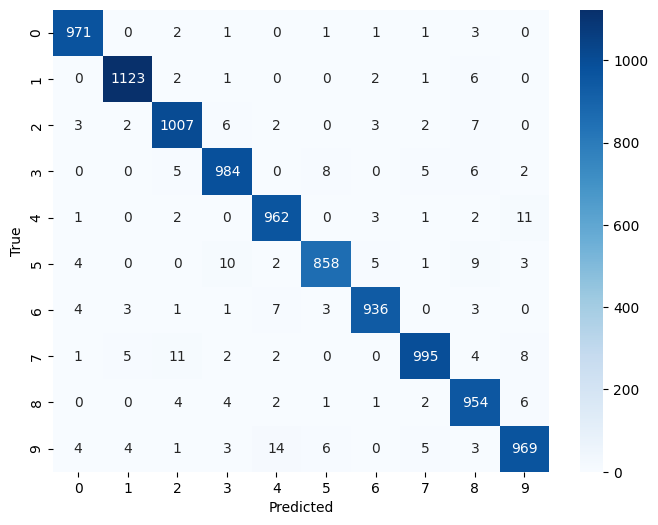

In [54]:
# Pra-pemrosesan data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0  # Normalisasi data
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Membangun model ANN
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Layer input
    layers.Dense(128, activation='relu'),   # Hidden layer 1 dengan aktivasi ReLU
    layers.Dense(64, activation='relu'),    # Hidden layer 2 dengan aktivasi ReLU
    layers.Dense(10, activation='softmax')  # Layer output dengan aktivasi softmax
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Akurasi pengujian:", test_acc)

# Prediksi kelas
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Matriks kebingungan
true_labels = np.argmax(test_labels, axis=1)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




* Pra-pemrosesan data: Bagian ini memuat data MNIST dan melakukan normalisasi pada gambar dengan membagi setiap piksel dengan 255.0. Label juga dikonversi menjadi representasi kategorikal.
* Membangun model ANN: Bagian ini mendefinisikan arsitektur dari model neural network. Model ini terdiri dari layer input yang meratakan gambar 28x28 menjadi vektor 1D, dua hidden layer dengan fungsi aktivasi ReLU, dan layer output dengan fungsi aktivasi softmax.
* Kompilasi model: Bagian ini mengatur optimizer, fungsi loss, dan metrik yang akan digunakan saat pelatihan model.
* Melatih model: Bagian ini melatih model dengan data latih. Model dilatih selama 10 epoch dengan ukuran batch 64 dan validasi split sebesar 0.2.
* Evaluasi model pada data pengujian: Bagian ini mengevaluasi performa model pada data pengujian dan mencetak akurasi pengujian.
* Prediksi kelas: Bagian ini membuat prediksi pada data pengujian dan mengubah probabilitas kelas menjadi label kelas.
* Matriks kebingungan: Bagian ini menghitung matriks kebingungan untuk mengevaluasi performa klasifikasi model.
* Plot matriks kebingungan: Bagian ini membuat plot heatmap dari matriks kebingungan menggunakan library seaborn dan matplotlib

